In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

In [2]:
k = 0.01
a = 70
b = 50

def x_linha(t,x):
    return k*(a-x)*(b-x)

### a)

Usando os parâmetros originais:

In [3]:
T = 20
h = 0.5

N = math.ceil(T/h)
N

40

In [4]:
t = np.arange(0, T+h, h)
t

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ])

Solução exata:

In [5]:
x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))
x_exato

array([ 0.        , 13.45291623, 21.82955206, 27.52309776, 31.62701216,
       34.71193205, 37.10481347, 39.00648161, 40.54711994, 41.81483304,
       42.87138623, 43.76137075, 44.51778986, 45.16559684, 45.72401049,
       46.20807412, 46.62973155, 46.99858619, 47.32244692, 47.60772768,
       47.85974446, 48.08293931, 48.28105135, 48.45724907, 48.6142336 ,
       48.75432029, 48.87950369, 48.99150974, 49.09183812, 49.18179673,
       49.26253012, 49.33504298, 49.40021968, 49.4588407 , 49.51159641,
       49.55909876, 49.60189124, 49.64045736, 49.67522797, 49.70658753,
       49.73487955])

In [6]:
IC = 0 # x(0)

w = np.zeros(N+1)
w[0] = IC

In [7]:
for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6
w    

array([ 0.        , 13.45108554, 21.82776465, 27.52161706, 31.62581997,
       34.71097057, 37.10403058, 39.00583692, 40.54658324, 41.81438182,
       42.87100352, 43.76104364, 44.51750839, 45.16535321, 45.72379852,
       46.20788886, 46.62956899, 46.99844304, 47.32232047, 47.60761568,
       47.85964502, 48.08285082, 48.28097246, 48.45717862, 48.61417059,
       48.75426385, 48.87945308, 48.99146431, 49.09179729, 49.18176001,
       49.26249707, 49.3350132 , 49.40019284, 49.4588165 , 49.51157457,
       49.55907905, 49.60187344, 49.64044128, 49.67521343, 49.70657439,
       49.73486767])

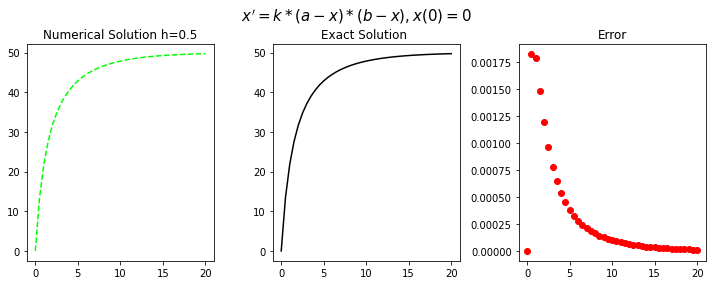

In [8]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

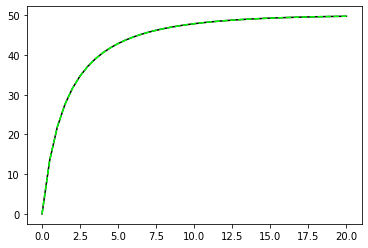

In [9]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [10]:
Erro = max(x_exato-w)
Erro

0.0018306916345292024

In [11]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

0.0018306916345292024

In [12]:
x_exato[-1]-w[-1]

1.1886168742591963e-05

### b)

Usando $T = 50$

In [13]:
T = 50
h = 0.5
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

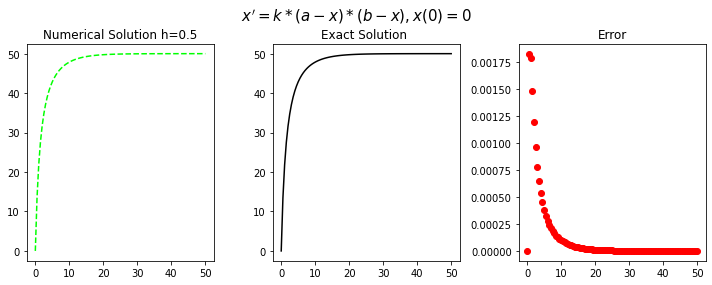

In [14]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

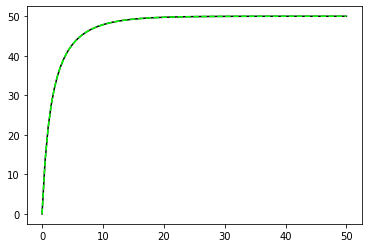

In [15]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [16]:
Erro = max(x_exato-w)
Erro

0.0018306916345292024

In [17]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

0.0018306916345292024

In [18]:
x_exato[-1]-w[-1]

3.22643458616767e-08

Usando $T = 100$

In [19]:
T = 100
h = 0.5
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

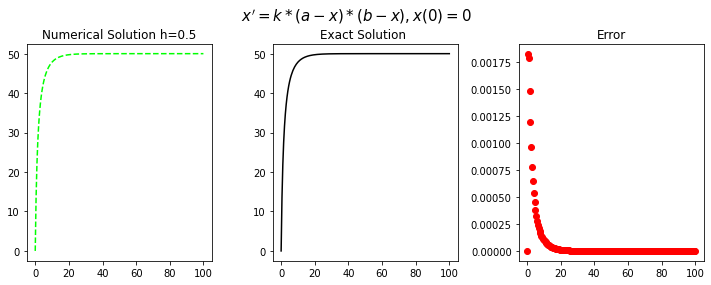

In [20]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

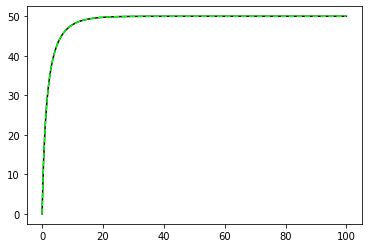

In [21]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [22]:
Erro = max(x_exato-w)
Erro

0.0018306916345292024

In [23]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

0.0018306916345292024

In [24]:
x_exato[-1]-w[-1]

1.7337242752546445e-12

Usando $T = 100$ e $h = 0.25$

In [25]:
T = 100
h = 0.25
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

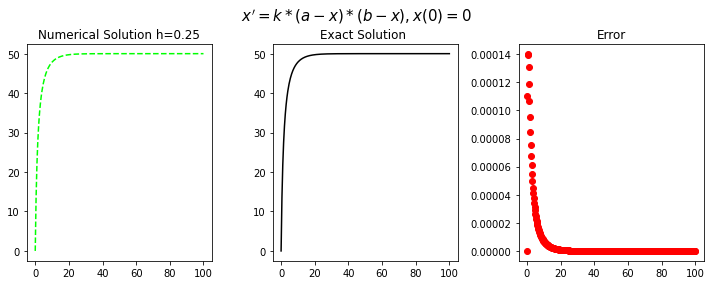

In [26]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

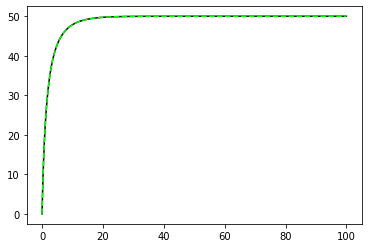

In [27]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [28]:
Erro = max(x_exato-w)
Erro

0.00014042563023863863

In [29]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

0.00014042563023863863

In [30]:
x_exato[-1]-w[-1]

1.2789769243681803e-13

Usando $T = 1000$ e $h = 0.25$

In [31]:
T = 1000
h = 0.25
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

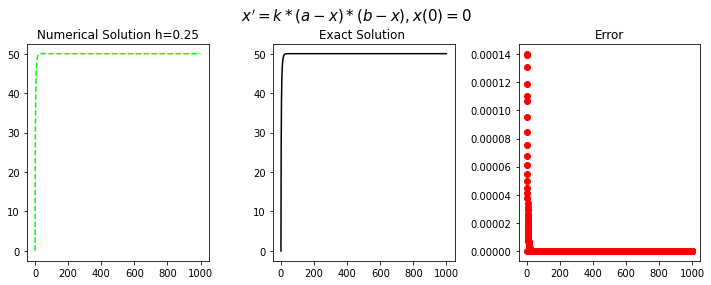

In [32]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

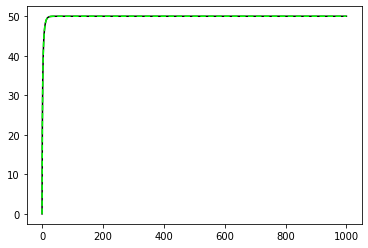

In [33]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [34]:
Erro = max(x_exato-w)
Erro

0.00014042563023863863

In [35]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

0.00014042563023863863

In [36]:
x_exato[-1]-w[-1]

7.105427357601002e-14

Usando $T = 1000$ e $h = 0.05$

In [37]:
T = 1000
h = 0.05
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

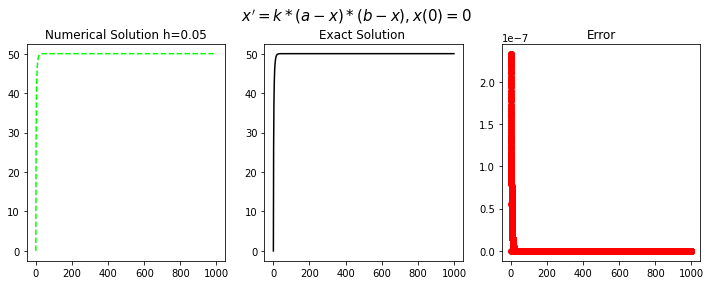

In [38]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

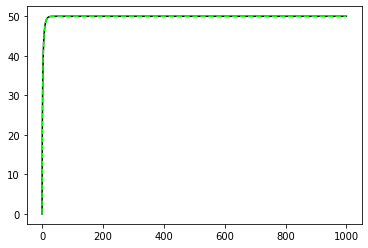

In [39]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [40]:
Erro = max(x_exato-w)
Erro

2.3326114195754144e-07

In [41]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

2.3326114195754144e-07

In [42]:
x_exato[-1]-w[-1]

3.552713678800501e-13

### c)

Usando $T = 100$ e $h = 1$

In [43]:
T = 100
h = 1
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

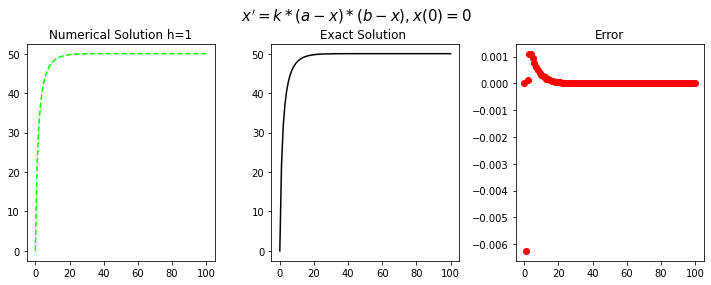

In [44]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

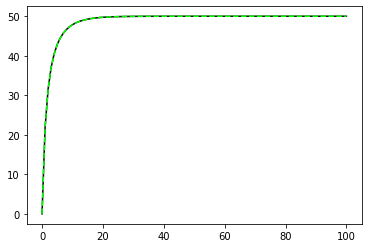

In [45]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [46]:
Erro = max(x_exato-w)
Erro

0.0011091525291391235

In [47]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

0.006251794234042762

In [48]:
x_exato[-1]-w[-1]

1.2725820397463394e-11

Usando $T = 100$ e $h = 2$

In [49]:
T = 100
h = 2
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

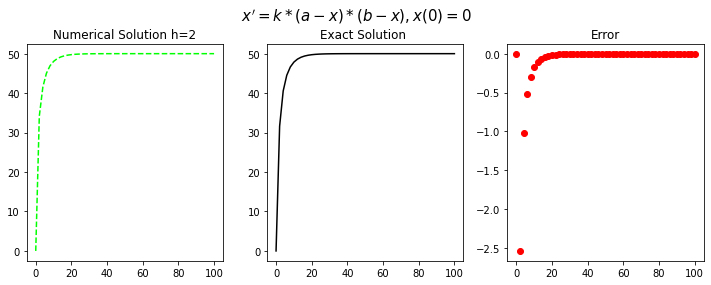

In [50]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

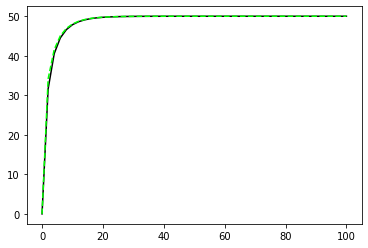

In [51]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [52]:
Erro = max(x_exato-w)
Erro

0.0

In [53]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

2.537395761099077

In [54]:
x_exato[-1]-w[-1]

-2.069008075977763e-09

Usando $T = 100$ e $h = 2.5$

In [55]:
T = 100
h = 2.5
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

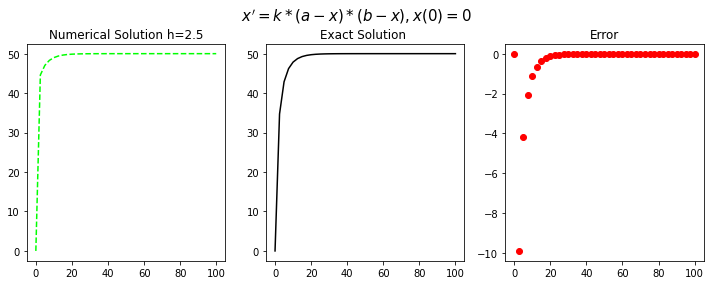

In [56]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

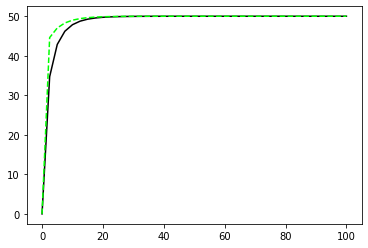

In [57]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [58]:
Erro = max(x_exato-w)
Erro

0.0

In [59]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

9.890449145016014

In [60]:
x_exato[-1]-w[-1]

-1.4756714961094985e-08

Usando $T = 100$ e $h = 5$

In [61]:
T = 100
h = 5
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

<ipython-input-2-6d4316e022f2>:6: RuntimeWarning: overflow encountered in double_scalars
  return k*(a-x)*(b-x)


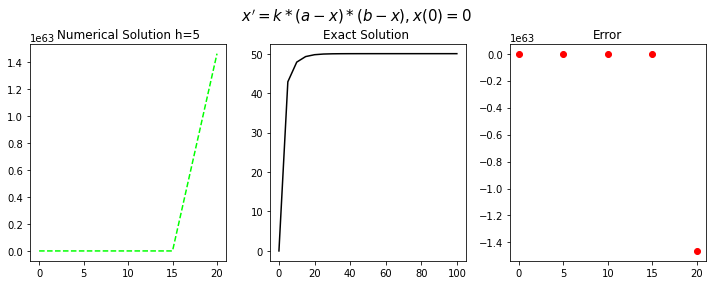

In [62]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

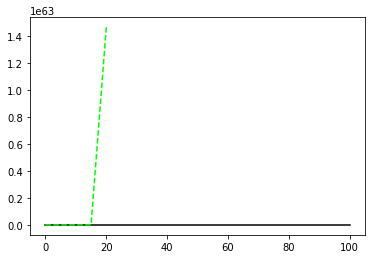

In [63]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [64]:
Erro = max(x_exato-w)
Erro

0.0

In [65]:
Erro_abs = max(abs(x_exato-w))
Erro_abs

inf

In [66]:
x_exato[-1]-w[-1]

-inf

Testando para valores grandes de $T$:

In [67]:
T = 10000
h = 0.5
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

In [68]:
x_exato[1]

13.452916234221014

In [69]:
w[1]

13.451085542586485

In [70]:
x_exato[-1]

50.0

In [71]:
w[-1]

49.999999999999964

In [72]:
T = 100000
h = 0.5
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

In [73]:
x_exato[1]

13.452916234221014

In [74]:
w[1]

13.451085542586485

In [75]:
x_exato[-1]

50.0

In [76]:
w[-1]

49.999999999999964

In [77]:
T = 200000
h = 0.5
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

In [78]:
x_exato[1]

13.452916234221014

In [79]:
w[1]

13.451085542586485

In [80]:
x_exato[-1]

50.0

In [81]:
w[-1]

49.999999999999964

Para valores grandes de $T$, é possível ver que a solução pelo método de Runge-Kutta tende a 50. Contudo, por inspeção exaustiva, encontrei alguns valores interessantes de $h$ que alteram a forma como esse valor é encontrado:

In [82]:
T = 200000
h = 2.67
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

In [83]:
x_exato[1]

35.59117575695174

In [84]:
w[1]

49.94402221109137

In [85]:
x_exato[-1]

50.0

In [86]:
w[-1]

49.99999999999999

In [87]:
T = 200000
h = 2.68
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

In [88]:
x_exato[1]

35.64063408858601

In [89]:
w[1]

50.29301704543909

In [90]:
x_exato[-1]

50.0

In [91]:
w[-1]

50.00000000000001

Note: ainda que no limite a solução tenda a 50, é possível notar que ela se aproxima por cima, já que o primeiro valor gerado é maior que 50.

Graficamente, utilizando $h=2.5$ e $h=2.8$ para facilitar a visualização:

In [92]:
T = 200000
h = 2.5
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

In [93]:
w[1]

44.6023811903558

In [94]:
w[-1]

49.99999999999999

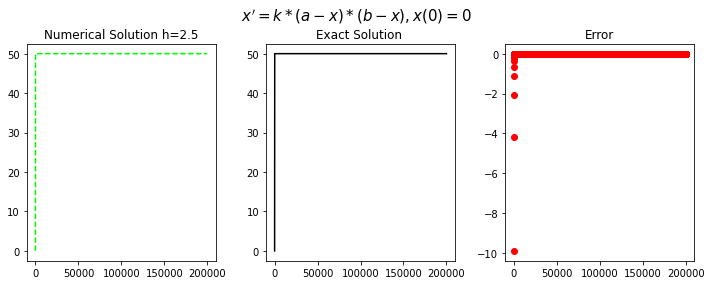

In [95]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

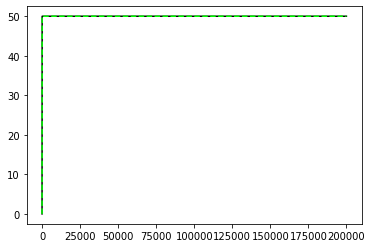

In [96]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [97]:
T = 200000
h = 2.8
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

In [98]:
w[1]

54.79456275988084

In [99]:
w[-1]

50.00000000000001

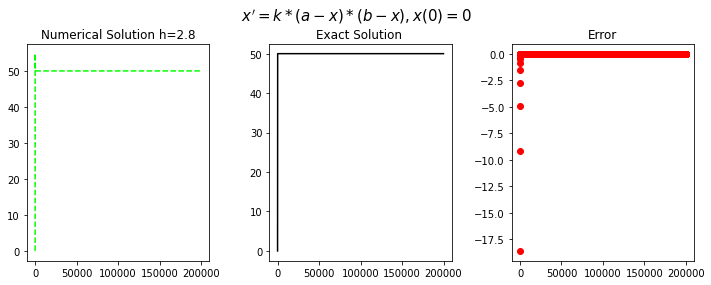

In [100]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

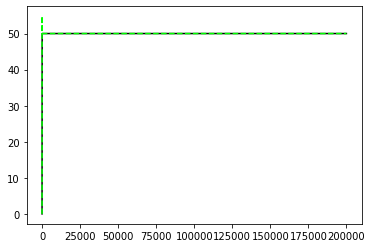

In [101]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

Além disso, foi possível encontrar o valor "limite" antes que tenhamos um erro de overflow:

In [102]:
T = 200000
h = 3.12
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

In [103]:
x_exato[1]

37.60020663150404

In [104]:
w[1]

69.54970610832893

In [105]:
x_exato[-1]

50.0

In [106]:
w[-1]

50.0

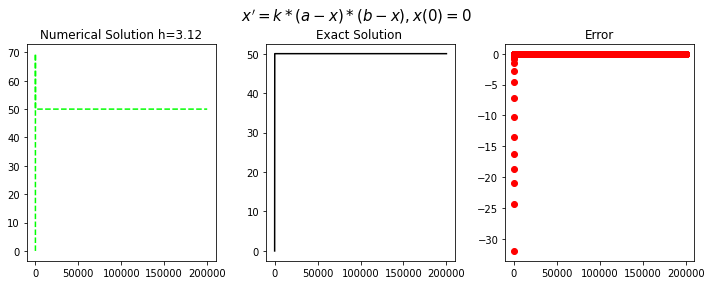

In [107]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

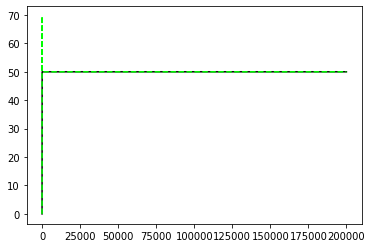

In [108]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()

In [109]:
T = 200000
h = 3.13
N = math.ceil(T/h)

t = np.arange(0, T+h, h)

x_exato = 350*(1-np.exp(-0.2*t))/(7-5*np.exp(-0.2*t))

IC = 0 # x(0)
w = np.zeros(N+1)
w[0] = IC

for i in range(0, N):
    k1 = h*x_linha(t[i], w[i])
    k2 = h*x_linha(t[i]+h/2, w[i]+k1/2)
    k3 = h*x_linha(t[i]+h/2, w[i]+k2/2)
    k4 = h*x_linha(t[i]+h, w[i]+k3)
    w[i+1] = w[i]+(k1+2*k2+2*k3+k4)/6

<ipython-input-2-6d4316e022f2>:6: RuntimeWarning: overflow encountered in double_scalars
  return k*(a-x)*(b-x)


In [110]:
x_exato[1]

37.6402919022592

In [111]:
w[1]

70.06801012771969

In [112]:
x_exato[-1]

50.0

In [113]:
w[-1]

inf

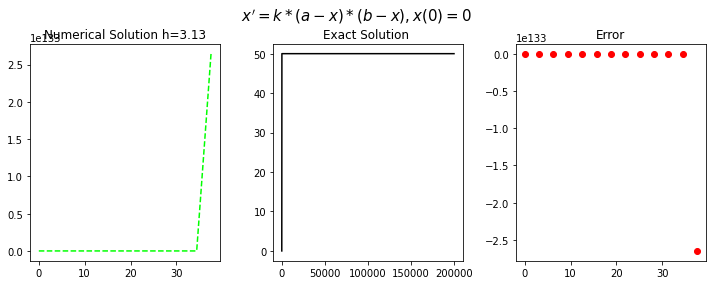

In [114]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='lime')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,x_exato,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,x_exato-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$x'=k*(a-x)*(b-x),   x(0)=%s$"%(IC), fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85) 

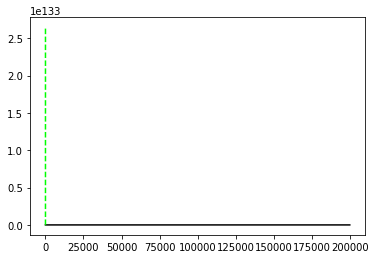

In [115]:
plt.subplot(1, 1, 1)

Exact = plt.plot(t,x_exato,color='black')

Numerical = plt.plot(t,w, '--',color='lime')

plt.show()